## Modeling for predicting critical outcome at ED triage

Work Flow:
1. Task-specific filter
2. Variable selection
3. Modeling script
4. Performance output


### Load train and test

In [28]:
import os
import time
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from helpers6 import PlotROCCurve
from dataset_path import output_path

path = output_path

df_train = pd.read_csv((os.path.join(path, 'train2.csv')))
df_test = pd.read_csv((os.path.join(path, 'test2.csv')))
confidence_interval = 95
random_seed = 0

In [29]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 

df_train.head()

,subject_id,hadm_id,stay_id,intime_ed,outtime_ed,anchor_age,gender,anchor_year,dod,admittime,dischtime,deathtime,race,race_recoded,edregtime,edouttime,insurance,in_year,age,age_derived,severity2,before_ed_mortality,outcome_hospitalization,outcome_inhospital_mortality,intime_icu,outtime_icu,outcome_icu_transfer_12h,outcome_critical,outcome_ed_revisit_3d,triage_temperature,triage_temperature_recoded_2,triage_heartrate,triage_heartrate_recoded,triage_resprate,triage_resprate_recoded,triage_o2sat,triage_o2sat_recoded,triage_sbp,triage_sbp_recoded,triage_dbp,triage_dbp_recoded,hos_los,ed_los,triage_pain,triage_pain_recoded,triage_acuity,chiefcomplaint,chiefcom_chest_pain,chiefcom_abdominal_pain,chiefcom_headache,...,eci_HTN1,eci_HTN2,eci_Paralysis,eci_NeuroOther,eci_Pulmonary,eci_DM1,eci_DM2,eci_Hypothyroid,eci_Renal,eci_Liver,eci_PUD,eci_HIV,eci_Lymphoma,eci_Tumor2,eci_Tumor1,eci_Rheumatic,eci_Coagulopathy,eci_Obesity,eci_WeightLoss,eci_FluidsLytes,eci_BloodLoss,eci_Anemia,eci_Alcohol,eci_Drugs,eci_Psychoses,eci_Depression,ed_temperature_last,ed_temperature_last_recoded,ed_heartrate_last,ed_heartrate_last_recoded,ed_resprate_last,ed_resprate_last_recoded,ed_o2sat_last,ed_o2sat_last_recoded,ed_sbp_last,ed_sbp_last_recoded,ed_dbp_last,ed_dbp_last_recoded,ed_pain_last,ed_pain_last_recoded,n_med,n_medrecon,Normal Distribution anchor_age,triage_MAP,score_CCI,score_CART,score_REMS,score_NEWS,score_NEWS2,score_MEWS
0,18971123,21753872.0,37200982,15/7/2149 22:41,16/7/2149 6:27,45.0,F,2149.0,NaN,16/7/2149 4:10,28/7/2149 18:37,NaN,WHITE,WHITE,15/7/2149 22:41,16/7/2149 6:27,Other,2149,45.0,0,0,False,True,False,NaN,NaN,False,False,False,37.444444,37.444444,102.0,102.0,19.0,19.0,100.0,100.0,133.0,133.0,88.0,88.0,302.0,8,0.0,0.0,2.0,Hypokalemia,False,False,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.333333,36.333333,72.0,72.0,16.0,16.0,100.0,100.0,165.0,165.0,105.0,105.0,0.0,0.0,3,1,0.396018,103.000000,0,0,2,1,1,2
1,15439233,NaN,31867345,20/12/2159 19:43,20/12/2159 19:59,18.0,M,2159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2159,18.0,0,0,False,False,False,NaN,NaN,False,False,False,37.111111,37.111111,70.0,70.0,20.0,20.0,99.0,99.0,151.0,151.0,64.0,64.0,NaN,0,7.0,7.0,3.0,MVC,False,False,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.666667,36.666667,60.0,60.0,16.0,16.0,100.0,100.0,132.0,132.0,70.0,70.0,7.0,7.0,1,0,0.054037,93.000000,0,0,0,0,0,1
2,15341533,NaN,30037900,2/9/2171 21:24,2/9/2171 21:27,40.0,F,2171.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2171,40.0,0,0,False,False,False,NaN,NaN,False,False,False,37.555556,37.555556,97.0,97.0,16.0,16.0,97.0,97.0,120.0,120.0,70.0,70.0,NaN,0,0.0,0.0,5.0,Med refill,False,False,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.555556,37.555556,95.0,95.0,18.0,18.0,98.0,98.0,113.0,113.0,67.0,67.0,0.0,0.0,0,0,0.304180,86.666667,0,0,0,1,1,1
3,13512582,NaN,38777853,8/11/2131 22:59,8/11/2131 23:04,70.0,F,2131.0,NaN,NaN,NaN,NaN,HISPANIC/LATINO - PUERTO RICAN,HISPANIC,NaN,NaN,NaN,2131,70.0,3,0,False,False,False,NaN,NaN,False,False,False,37.000000,37.000000,58.0,58.0,16.0,16.0,100.0,100.0,155.0,155.0,44.0,44.0,NaN,1,10.0,10.0,3.0,ABD PAIN,False,True,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37.111111,37.111111,51.0,51.0,18.0,18.0,96.0,96.0,173.0,173.0,63.0,63.0,2.0,2.0,3,2,0.836476,81.000000,3,13,7,0,0,1
4,17758321,NaN,35942414,25/6/2115 13:15,25/6/2115 13:38,50.0,M,2115.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2115,50.0,1,0,False,False,False,NaN,NaN,False,False,False,36.555556,36.555556,72.0,72.0,16.0,16.0,96.0,96.0,187.0,187.0,108.0,108.0,NaN,0,6.0,6.0,5.0,MEDICATION REFILL,False,False,False,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36.777778,36.777778,62.0,62.0,16.0,16.0,100.0,100.0,161.0,161.0,99.0,99.0,0.0,2.0,1,2,0.494049,134.333333,1,0,5,0,0,1


### 1. task-specific filter

In [30]:
#df_train = df_train[df_train['ed_death'] == False]
#df_test = df_test[df_test['ed_death'] == False].reset_index()

### 2. Variable Selection

In [31]:
variable = ["age", "race_recoded",
            
            "triage_temperature_recoded_2", "triage_heartrate_recoded", "triage_resprate_recoded", 
            "triage_o2sat_recoded", "triage_sbp_recoded", "triage_dbp_recoded",
            
            "severity2"]

outcome = "outcome_critical"

In [32]:
X_train = df_train[variable].copy()
y_train = df_train[outcome].copy()
X_test = df_test[variable].copy()
y_test = df_test[outcome].copy()

In [33]:
X_train.dtypes.to_frame().T

,age,race_recoded,triage_temperature_recoded_2,triage_heartrate_recoded,triage_resprate_recoded,triage_o2sat_recoded,triage_sbp_recoded,triage_dbp_recoded,severity2
0,float64,object,float64,float64,float64,float64,float64,float64,int64


In [34]:
encoder = LabelEncoder()
X_train['race_recoded'] = encoder.fit_transform(X_train['race_recoded'])
X_test['race_recoded'] = encoder.transform(X_test['race_recoded'])

In [35]:
print('class ratio')
ratio = y_train.sum()/(~y_train).sum()
print('positive : negative =', ratio, ': 1')

class ratio
positive : negative = 0.06275655051445725 : 1


### 3.  Modeling script

In [36]:
# Containers for all results
result_list = []

Logistic Regression:
Training time: 24.9029061794281 seconds
AUC: 0.7636648919926442
AUPRC: 0.21898235099609772
Sensitivity: 0.7107640195709447
Specificity: 0.6855135617976171
Score thresold: 0.055901564492301346
2.5 97.5


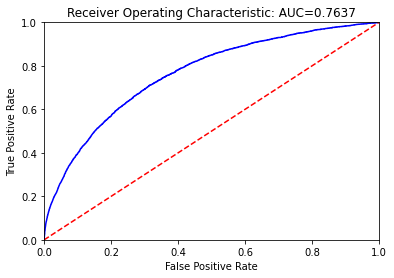

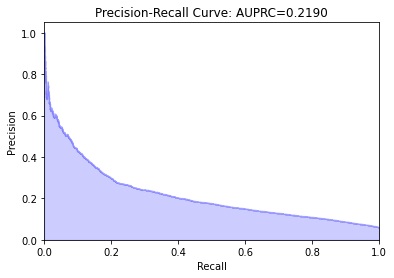

In [37]:
print("Logistic Regression:")
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=random_seed)
start = time.time()
logreg.fit(X_train,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = logreg.predict_proba(X_test)
result = PlotROCCurve(probs[:,1], y_test, ci=confidence_interval, random_seed=random_seed)

results = ["LR"]
results.extend(result)
results.append(runtime)
result_list.append(results)

In [38]:
# Standardize the data since we have numerical values like sbp and dbp in large range
# https://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import LabelEncoder, StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)


X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
#logistic regression with hyper parameter tuning

from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [40]:
print("Logistic Regression with Hypertuning:")
model=LogisticRegression()

# define the parameters for tuning
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

# define cross validation parameters
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

start = time.time()

# use grid search to find the best parameters
lr_model = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
lr_model.fit(X_train_scaled, y_train)

runtime = time.time()-start
print('LR_HT Training time:', runtime, 'seconds')

# summarize results for hypertuning for Logistic Regression
print("Best: %f using %s" % (lr_model.best_score_, lr_model.best_params_))

Logistic Regression with Hypertuning:
LR_HT Training time: 440.8745334148407 seconds
Best: 0.762632 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [41]:
ht_y_prob = lr_model.predict_proba(X_test_scaled)
ht_y_pred = lr_model.predict(X_test_scaled)

ht_pred_compare = pd.DataFrame({"predicted Probability" : ht_y_prob[:,1],"Predicted":ht_y_pred, "Actual" : y_test})
ht_pred_compare.head(10)

,predicted Probability,Predicted,Actual
0,0.087046,False,True
1,0.106737,False,False
2,0.018098,False,False
3,0.023415,False,False
4,0.117404,False,False
5,0.019845,False,False
6,0.024148,False,False
7,0.029144,False,False
8,0.169306,False,False
9,0.007258,False,False


In [42]:
lr_top_features = pd.DataFrame({"Feature": X_train.columns,"Coefficient":lr_model.best_estimator_.coef_[0]})
lr_top_features.reindex(lr_top_features.Coefficient.abs().sort_values(ascending = False).index).head(10)

,Feature,Coefficient
0,age,0.660595
3,triage_heartrate_recoded,0.345312
6,triage_sbp_recoded,-0.317808
4,triage_resprate_recoded,0.246704
5,triage_o2sat_recoded,-0.213198
1,race_recoded,-0.096640
7,triage_dbp_recoded,-0.056673
8,severity2,0.031197
2,triage_temperature_recoded_2,-0.002137


AUC: 0.7654548929317493
AUPRC: 0.21953713441843636
Sensitivity: 0.6940158073014678
Specificity: 0.7033786801540263
Score thresold: 0.059636820014732736
2.5 97.5


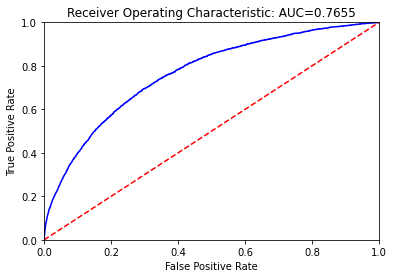

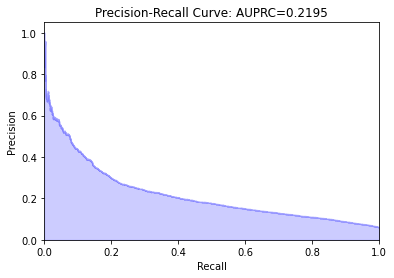

In [55]:
confidence_interval = 95
result = PlotROCCurve(ht_y_prob[:,1],y_test, ci=confidence_interval)

results = ["LR_HT"]
results.extend(result)
results.append(runtime)
result_list.append(results)

RandomForest:
Training time: 79.01076650619507 seconds
AUC: 0.8476440732936884
AUPRC: 0.3515288700007801
Sensitivity: 0.735415882574332
Specificity: 0.7750685030720761
Score thresold: 0.07073015873015871
2.5 97.5


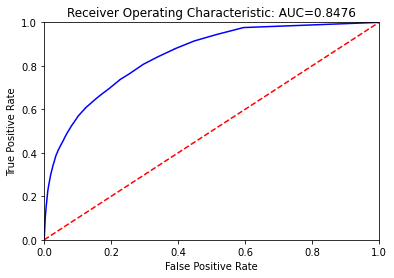

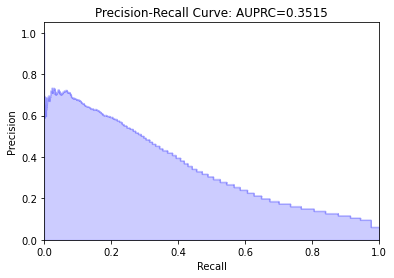

[0.13976939 0.06921608 0.12739132 0.15570262 0.07716159 0.06978111
 0.16370402 0.13582369 0.06145019]


In [43]:
print("RandomForest:")
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=random_seed)
start = time.time()
rf.fit(X_train,y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = rf.predict_proba(X_test)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)
importances = rf.feature_importances_
print(importances)

results = ["RF"]
results.extend(result)
results.append(runtime)
result_list.append(results)

GradientBoosting:
Training time: 73.4052848815918 seconds
AUC: 0.8635530221585193
AUPRC: 0.38755761648858966
Sensitivity: 0.7770041400075273
Specificity: 0.7557427905797713
Score thresold: 0.05971972934723758
2.5 97.5


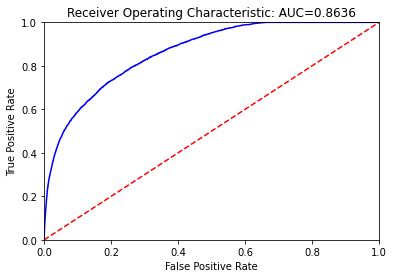

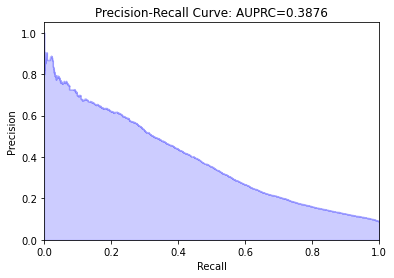

In [44]:
print("GradientBoosting:")
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=random_seed)
start = time.time()
gb.fit(X_train, y_train)
runtime = time.time()-start
print('Training time:', runtime, 'seconds')
probs = gb.predict_proba(X_test)
result = PlotROCCurve(probs[:,1],y_test, ci=confidence_interval, random_seed=random_seed)

results = ["GB"]
results.extend(result)
results.append(runtime)
result_list.append(results)

In [45]:
class MLP(tf.keras.Model):
    def __init__(self):
        super(MLP, self).__init__()
        self.dense_1 = Dense(128, activation='relu')
        self.dense_2 = Dense(64, activation='relu')
        self.classifier = Dense(1, activation='sigmoid')

    def call(self, x):
        x = self.dense_1(x)
        x = self.dense_2(x)
        return self.classifier(x)

In [46]:
# skip this cell if not retraining
mlp = MLP()
mlp.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(learning_rate=0.001), 
              metrics=['accuracy', 'AUC', {'auprc': metrics.AUC(name='auprc', curve='PR')}, 
                       'TruePositives', 'TrueNegatives', 'Precision', 'Recall'])
start = time.time()
mlp.fit(X_train.astype(np.float32), y_train, batch_size=200, epochs=20)
runtime = time.time() - start
print('Training time:', runtime, 'seconds')
mlp.save('ctmlp_derived')

Epoch 1/20
1764/1764 [==============================] - 8s 3ms/step - loss: 0.2141 - accuracy: 0.9390 - auc: 0.7181 - auprc: 0.1691 - true_positives: 1084.0000 - true_negatives: 330034.0000 - precision: 0.3796 - recall: 0.0521
Epoch 2/20
1764/1764 [==============================] - 5s 3ms/step - loss: 0.2008 - accuracy: 0.9409 - auc: 0.7482 - auprc: 0.1986 - true_positives: 955.0000 - true_negatives: 330845.0000 - precision: 0.4984 - recall: 0.0459
Epoch 3/20
1764/1764 [==============================] - 5s 3ms/step - loss: 0.1964 - accuracy: 0.9411 - auc: 0.7641 - auprc: 0.2109 - true_positives: 854.0000 - true_negatives: 331021.0000 - precision: 0.5210 - recall: 0.0410
Epoch 4/20
1764/1764 [==============================] - 5s 3ms/step - loss: 0.1933 - accuracy: 0.9414 - auc: 0.7751 - auprc: 0.2250 - true_positives: 810.0000 - true_negatives: 331142.0000 - precision: 0.5495 - recall: 0.0389
Epoch 5/20
1764/1764 [==============================] - 5s 3ms/step - loss: 0.1908 - accuracy: 

MLP:
2755/2755 [==============================] - 3s 1ms/step
AUC: 0.8298948972093537
AUPRC: 0.3171314337550454
Sensitivity: 0.7506586375611592
Specificity: 0.7433699890153664
Score thresold: 0.07353434
2.5 97.5


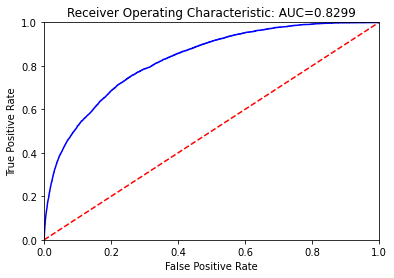

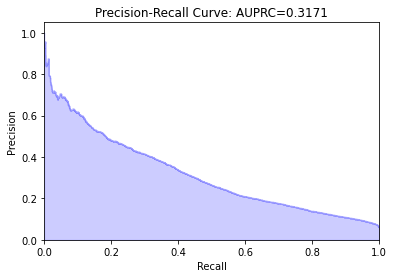

In [47]:
print("MLP:")
mlp = load_model('ctmlp_derived')
probs = mlp.predict(X_test.astype(np.float32))
result = PlotROCCurve(probs,y_test, ci=confidence_interval, random_seed=random_seed)
results = ["MLP"]
results.extend(result)
results.append(runtime)
result_list.append(results)

In [48]:
def get_score_performance(s, random_seed=0):
    print(s)
    score = np.array(df_test[s])
    result = PlotROCCurve(score,y_test, ci=confidence_interval, random_seed=random_seed)
    runtime = 0
    results = [s]
    results.extend(result)
    results.append(runtime)
    result_list.append(results)

score_NEWS
AUC: 0.6376764336379722
AUPRC: 0.16232514515864588
Sensitivity: 0.4708317651486639
Specificity: 0.7928732662989028
Score thresold: 2
2.5 97.5


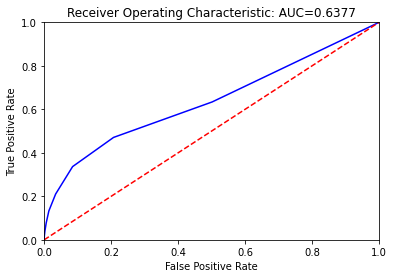

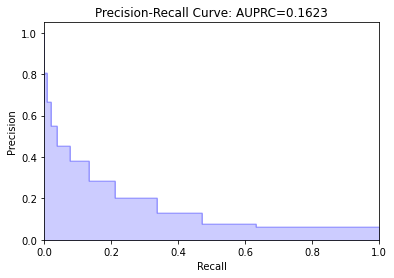

In [49]:
get_score_performance("score_NEWS", random_seed=random_seed)

score_NEWS2
AUC: 0.6227714867884439
AUPRC: 0.14694447267184985
Sensitivity: 0.4213398569815581
Specificity: 0.8208418333474162
Score thresold: 2
2.5 97.5


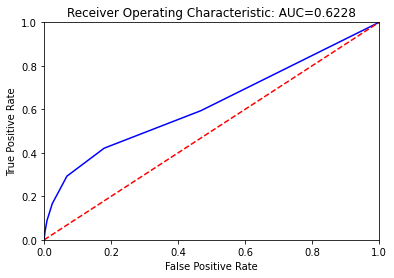

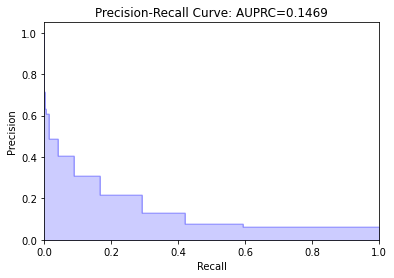

In [50]:
get_score_performance("score_NEWS2", random_seed=random_seed)

score_REMS
AUC: 0.6884323183732768
AUPRC: 0.111151890501994
Sensitivity: 0.682913059841927
Specificity: 0.612809772702582
Score thresold: 5
2.5 97.5


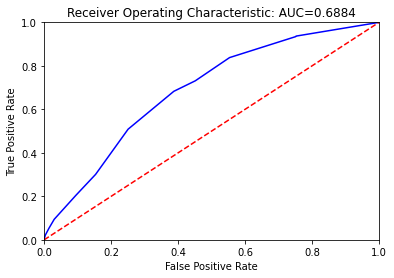

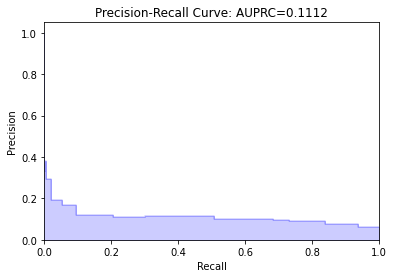

In [51]:
get_score_performance("score_REMS", random_seed=random_seed)

score_MEWS
AUC: 0.6212346128095318
AUPRC: 0.11722823112263829
Sensitivity: 0.44617990214527664
Specificity: 0.7705177263015583
Score thresold: 2
2.5 97.5


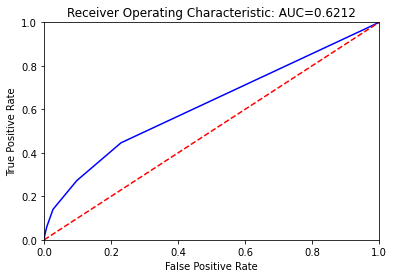

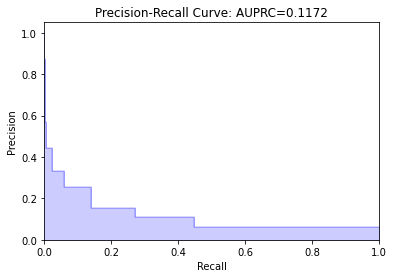

In [52]:
get_score_performance("score_MEWS", random_seed=random_seed)

### 4. Performance output

In [56]:
result_df = pd.DataFrame(result_list, columns=['Model', 'auroc', 'ap', 'sensitivity', 'specificity', 'threshold', 
                                               'lower_auroc', 'upper_auroc', 'std_auroc', 'lower_ap', 'upper_ap', 
                                               'std_ap', 'lower_sensitivity', 'upper_sensitivity', 'std_sensitivity', 
                                               'lower_specificity', 'upper_specificity', 'std_specificity', 'runtime'])
result_df.to_csv(os.path.join(path, 'result_crit_triage_derived2.csv'), index=False)

result_df = result_df.round(3)
formatted_result_df = pd.DataFrame()
formatted_result_df[['Model', 'Threshold']] = result_df[['Model', 'threshold']]
formatted_result_df['AUROC'] = result_df['auroc'].astype(str) + ' (' + result_df['lower_auroc'].astype(str) + \
                               '-' + result_df['upper_auroc'].astype(str) + ')'
formatted_result_df['AUPRC'] = result_df['ap'].astype(str) + ' (' + result_df['lower_ap'].astype(str) + \
                               '-' + result_df['upper_ap'].astype(str) + ')'
formatted_result_df['Sensitivity'] = result_df['sensitivity'].astype(str) + ' (' + result_df['lower_sensitivity'].astype(str) + \
                                     '-' + result_df['upper_sensitivity'].astype(str) + ')'
formatted_result_df['Specificity'] = result_df['specificity'].astype(str) + ' (' + result_df['lower_specificity'].astype(str) + \
                                     '-' + result_df['upper_specificity'].astype(str) + ')'
formatted_result_df[['Runtime']] = result_df[['runtime']]
formatted_result_df.to_csv(os.path.join(path, 'task2_derived2.csv'), index=False)
formatted_result_df

,Model,Threshold,AUROC,AUPRC,Sensitivity,Specificity,Runtime
0,LR,0.056,0.764 (0.757-0.768),0.219 (0.211-0.227),0.711 (0.688-0.723),0.686 (0.682-0.704),24.903
1,RF,0.071,0.848 (0.846-0.852),0.352 (0.34-0.365),0.735 (0.735-0.776),0.775 (0.739-0.777),79.011
2,GB,0.060,0.864 (0.861-0.868),0.388 (0.379-0.4),0.777 (0.736-0.788),0.756 (0.752-0.8),73.405
3,MLP,0.074,0.83 (0.827-0.834),0.317 (0.309-0.331),0.751 (0.738-0.761),0.743 (0.737-0.754),106.050
4,score_NEWS,2.000,0.638 (0.629-0.645),0.162 (0.154-0.169),0.471 (0.458-0.482),0.793 (0.791-0.796),0.000
5,score_NEWS2,2.000,0.623 (0.615-0.631),0.147 (0.14-0.153),0.421 (0.409-0.434),0.821 (0.819-0.824),0.000
6,score_REMS,5.000,0.688 (0.683-0.693),0.111 (0.108-0.114),0.683 (0.676-0.693),0.613 (0.61-0.616),0.000
7,score_MEWS,2.000,0.621 (0.615-0.628),0.117 (0.112-0.122),0.446 (0.434-0.459),0.771 (0.768-0.773),0.000
8,LR_HT,0.060,0.765 (0.759-0.77),0.22 (0.212-0.228),0.694 (0.682-0.713),0.703 (0.687-0.709),106.050


In [54]:
importance_df = pd.DataFrame(zip(variable, importances), columns=['Variable','Importance'])
importance_df.to_csv(os.path.join(path, 'importances_crit_triage_derived2.csv'))
importance_df.sort_values(by='Importance', axis=0,ascending=False)

,Variable,Importance
6,triage_sbp_recoded,0.163704
3,triage_heartrate_recoded,0.155703
0,age,0.139769
7,triage_dbp_recoded,0.135824
2,triage_temperature_recoded_2,0.127391
4,triage_resprate_recoded,0.077162
5,triage_o2sat_recoded,0.069781
1,race_recoded,0.069216
8,severity2,0.061450
